In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [3]:
df = pd.DataFrame(x , columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df["target"] = y 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size=0.2 , random_state=42)


In [6]:
scaler_std = StandardScaler()
x_train_scaled = scaler_std.fit_transform(x_train)
x_test_scaled = scaler_std.transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
knn = KNeighborsClassifier(n_neighbors= 5 )
knn.fit(X=x_train , y= y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred = knn.predict(X=x_test)
acc = accuracy_score(y_test , y_pred)
print("accuracy: " , acc)

accuracy:  1.0


In [11]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [12]:
models = {
    "Logestic" : LogisticRegression(),
    "SVM" : SVC()
}

for name , model in models.items():
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    print(name  , "accuracy:" , accuracy_score(y_test , y_pred))

Logestic accuracy: 1.0
SVM accuracy: 1.0


In [13]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)
    print(name, "CV Mean Accuracy:", scores.mean())

Logestic CV Mean Accuracy: 0.9733333333333334
SVM CV Mean Accuracy: 0.9666666666666666


c:\Users\Amirhossein Ravan\Desktop\On Academy\Python\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


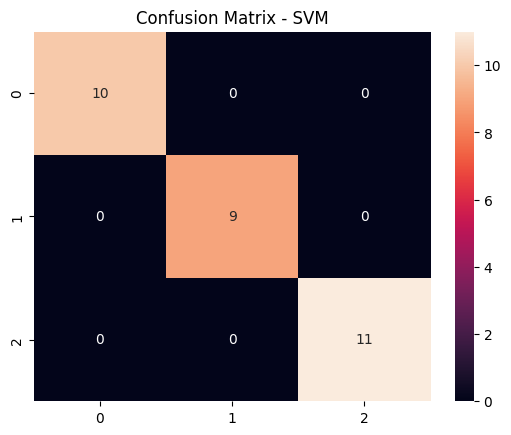

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - SVM")
plt.show()

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

import numpy as np
importance = np.abs(model.coef_).mean(axis=0)

for i,v in enumerate(importance):
    print(f"{iris.feature_names[i]}: {v}")

sepal length (cm): 0.33896631031499663
sepal width (cm): 0.641653810478598
petal length (cm): 1.7254306954410559
petal width (cm): 1.1829954756590333
